In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv',nrows=40000)

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(40000, 2)

In [5]:
df['review'] = df['review'].str.lower()

In [6]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [7]:
# regular expression


In [8]:
import re

In [9]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [10]:
df['review'] = df['review'].apply(remove_html_tags)

In [11]:
# remove url

In [12]:
def remove_url(text):
    pattern = re.compile(r'https?://\s+|www\.\s+')
    return pattern.sub('',text)

In [13]:
df['review'] = df['review'].apply(remove_url)

In [14]:
# remove punctuation

In [15]:
import string

In [16]:
def remove_punctuation(text):
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)

In [17]:
df['review'] = df['review'].apply(remove_punctuation)

In [19]:
# remove stopwords

In [20]:
from nltk.corpus import stopwords
import numpy as np

In [21]:
import nltk
from nltk.corpus import stopwords


# Preload the stopwords list
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Use list comprehension for efficiency
    filtered_sentence = [word for word in text.split() if word not in stop_words]
    return ' '.join(filtered_sentence)


In [22]:
df['review'] = df['review'].apply(remove_stopwords)

In [23]:
df['review'].head()

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [24]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
39995,marvelously funny comedy great cast john ritte...,positive
39996,plot central characters moving cameras closeup...,positive
39997,show awesome love actors great story lines cha...,positive
39998,fact movie entitled successful movie switzerla...,negative


In [25]:
x = df['review']

In [26]:
y = df['sentiment']

In [27]:
x[1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [28]:
y[1]

'positive'

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [32]:
# tokenizer

In [33]:
import tensorflow

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [35]:
tokenizer = Tokenizer()

In [36]:
tokenizer.fit_on_texts(x_train)

In [37]:
# tokenizer.word_index

In [38]:
x_train

14307    soon movie releasedsalman khan handed 6 year i...
17812    often tagged comedy man white suit laying far ...
11020    first three aztec mummies film one best knowle...
15158    came surprise impact resoloution film automati...
24990    long hard night partied away walkabout islingt...
                               ...                        
6265     earth five us keep repeating one title actuall...
11284    shadow magic recaptures joy amazement first mo...
38158    avoid one terrible movie exciting pointless mu...
860      production quite surprise absolutely love obsc...
15795    decent movie although little bit short time pa...
Name: review, Length: 32000, dtype: object

In [39]:
x_train_tokenized= tokenizer.texts_to_sequences(x_train)
x_test_tokenized= tokenizer.texts_to_sequences(x_test)

In [40]:
vocab_length = len(tokenizer.word_index)+1
vocab_length

167516

In [41]:
max_length = max([len(x) for x in x_train_tokenized])

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
x_train_padd = pad_sequences(x_train_tokenized,padding='post',maxlen = 100)

In [44]:
x_test_padd = pad_sequences(x_test_tokenized,padding='post',maxlen = 100)

In [45]:
x_train_padd.shape

(32000, 100)

In [46]:
x_test_padd.shape

(8000, 100)

In [47]:
y_train = np.where(y_train == 'positive', 1, 0)
y_test = np.where(y_test == 'positive', 1, 0)

In [48]:
import tensorflow
from tensorflow.keras import Sequential

In [49]:
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping



In [50]:
model = Sequential()
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.add(Embedding(input_dim=vocab_length, output_dim=50, input_shape=(max_length,)))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\bv261\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1165, 50)            │       8,375,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1165, 128)           │          58,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1165, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1165, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,455,321 (32.25 MB)

 Trainable params: 8,455,321 (32.25 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(x_train_padd, y_train, epochs=5, batch_size=64, validation_data=(x_test_padd, y_test), callbacks=[early_stopping])

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 179ms/step - accuracy: 0.6551 - loss: 0.5823 - val_accuracy: 0.7889 - val_loss: 0.4922
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 89s 178ms/step - accuracy: 0.8069 - loss: 0.4643 - val_accuracy: 0.8070 - val_loss: 0.4165
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 90s 181ms/step - accuracy: 0.8778 - loss: 0.3204 - val_accuracy: 0.8450 - val_loss: 0.3925
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 92s 185ms/step - accuracy: 0.9224 - loss: 0.2274 - val_accuracy: 0.8544 - val_loss: 0.3754
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 181ms/step - accuracy: 0.9507 - loss: 0.1584 - val_accuracy: 0.7704 - val_loss: 0.6121


In [53]:
import matplotlib.pyplot as plt

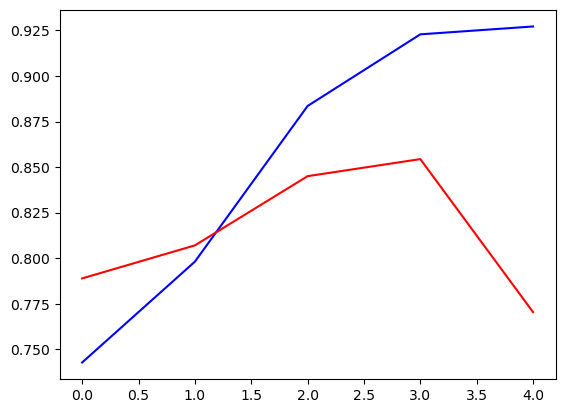

In [54]:
plt.plot(history.history['accuracy'], label='Train Data', color='blue')

# Plot predict data
plt.plot(history.history['val_accuracy'], label='Predict Data', color='red')
plt.show()

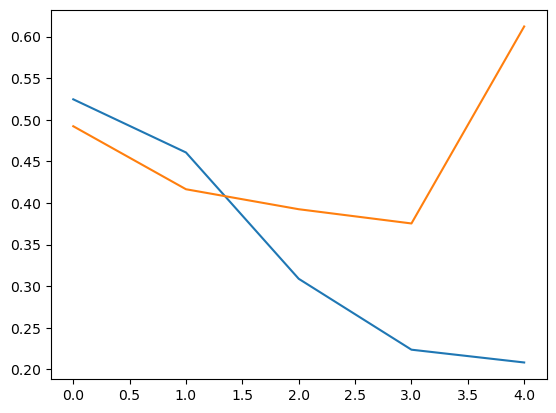

In [55]:
# plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [66]:
# save model
model.save('sentiment_analysis.hdf5')

model.save('my_model.h5', save_format='tf')


In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle
# Save the tokenizer
with open('my_model_tokenize.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
xx = ["""good movies i like the movie"""]
x = tokenizer.texts_to_sequences(xx)
paddx = pad_sequences(x,padding='post',maxlen=100)
pred = model.predict(paddx)
result=[]
for i in pred:
    if i>=0.5:
        result.append(1)
    else:
        result.append(0)
print(len(xx))
for i in range(len(xx)):
    print(xx[i])
    if result[i]==1:
        s='Positive'
    else:
        s='Negative'
    print("Predicted sentiment : ",s)

In [ ]:

# reviews on which we need to predict
sentence = [""""Too slow paced, fill will multiple unnecessary character and there stories. Overall waste of time and very bad experience. Could not connect to any of the characters in the film. I have no idea why it is so hyped over the review channels. I saw it on no 1 rank in some yt channel for top 10 movies of 2023,and bow I am going to unsubscribe that channel."""]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=100)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)